# Elastic Net

Combina la regresión Lasso con la regresión Ridge, añadiendo un término en norma L1 (Lasso) y otro término en norma L2 (Ridge)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [27]:
session = tf.Session()

In [28]:
iris = datasets.load_iris()

In [29]:
x_vals = np.array([[x[1], x[2], x[3]] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

In [30]:
batch_size=50
learning_rate = 0.001

- $ x \in\mathbb R^3 $
- $ A \in\mathbb R_{3\times1} $
- $ y = Ax + b \in \mathbb R $

In [31]:
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[3,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
y_pred = tf.add(tf.matmul(x_data, A), b)

$$ Loss = \sum\frac{(y_r - y_p)^2}{n} + \alpha \cdot |A| + \beta \cdot A^2 $$

In [32]:
elastic_param1 = tf.constant(1.0)
elastic_param2 = tf.constant(1.0)

l1_a_loss = tf.reduce_mean(tf.abs(A))
l2_a_loss = tf.reduce_mean(tf.square(A))

e1_term = tf.multiply(elastic_param1, l1_a_loss)
e2_term = tf.multiply(elastic_param2, l2_a_loss)

loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target - y_pred)), e1_term), e2_term), 0)

In [33]:
init = tf.global_variables_initializer()
session.run(init)

In [34]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

In [35]:
loss_vector = []

for i in range(1000):
    rand_idx = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_idx]
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vector.append(temp_loss[0])
    if (i+1)%100 == 0:
        print("Step #{} ==> A = {}, b = {}, Loss = {}".format(i+1, session.run(A), session.run(b), temp_loss))

Step #100 ==> A = [[0.9847991 ]
 [0.09077697]
 [1.7062886 ]], b = [[0.13641086]], Loss = [2.941668]
Step #200 ==> A = [[1.044773  ]
 [0.09471473]
 [1.544179  ]], b = [[0.18973029]], Loss = [2.6182108]
Step #300 ==> A = [[1.0745447 ]
 [0.11269621]
 [1.4015864 ]], b = [[0.23592812]], Loss = [2.3506405]
Step #400 ==> A = [[1.0904554 ]
 [0.13030137]
 [1.2713085 ]], b = [[0.27835488]], Loss = [2.0722923]
Step #500 ==> A = [[1.0959029]
 [0.1546639]
 [1.1545224]], b = [[0.31815875]], Loss = [2.0058198]
Step #600 ==> A = [[1.0926309 ]
 [0.18225896]
 [1.0489477 ]], b = [[0.35559368]], Loss = [1.8745089]
Step #700 ==> A = [[1.0841802 ]
 [0.21469507]
 [0.9536814 ]], b = [[0.3915763]], Loss = [1.6783931]
Step #800 ==> A = [[1.0719715 ]
 [0.24267486]
 [0.8652795 ]], b = [[0.42604432]], Loss = [1.630518]
Step #900 ==> A = [[1.0617007 ]
 [0.27487662]
 [0.7850206 ]], b = [[0.4607165]], Loss = [1.5501058]
Step #1000 ==> A = [[1.046507  ]
 [0.29574752]
 [0.7085426 ]], b = [[0.49329105]], Loss = [1.41676

In [46]:
slope = session.run(A)
[[intercept]] = session.run(b)

print(str(slope[0][0]) + " x1 + " + str(slope[1][0]) + " x2 + " + str(slope[2][0]) + " x3 + " + str(intercept))

1.046507 x1 + 0.29574752 x2 + 0.7085426 x3 + 0.49329105


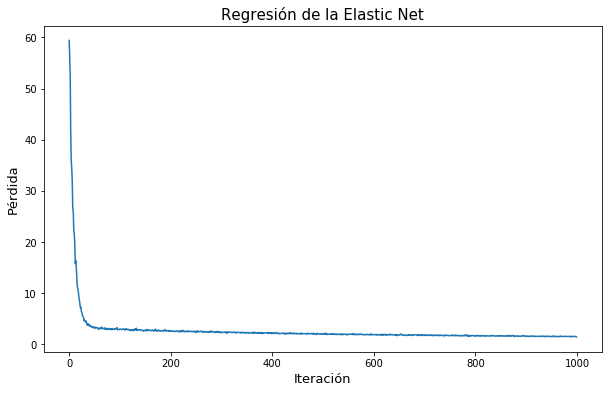

In [49]:
plt.figure(figsize=(10,6))
plt.plot(loss_vector)
plt.title("Regresión de la Elastic Net", fontsize=15)
plt.xlabel("Iteración", fontsize=13)
plt.ylabel("Pérdida", fontsize=13)
plt.show()